In [1]:
import numpy as np
from TimeTagger import *
import time
import datetime
import os

In [2]:
tagger = createTimeTagger()

In [3]:
SPAD_CH = 1 # SPAD Channel
TRIG_CH = 3 # Trigger Channel

# introduce delay in trig channel
delay = 1.04e6 # in picosecond
tagger.setInputDelay(3,delay)

bin_width = 10e-12 # in seconds, check once
c = 3*1e10 #cm
t_acq = 1
n_repeat = 100 #do it for 100 different times to get error estimate
nbins = int(50e-9/bin_width) #2 microsecond of time data
rep_rate = 2#1kHz
laser_power = np.round(40 * rep_rate,3) #mW

param = 'binwidth'
path = f"Z:/YRF/Experiments/Imaging/3_march/TTL/{param}/3kHz"
# os.mkdir(path+f"/{int(bin_width*1e12)}")

avg_noise_count = 200
# important params: t_acq, bin_width, laser_power

In [4]:
with open(f'Z:/YRF/Experiments/Imaging/3_march/TTL/{param}/3kHz/details.txt', 'w') as f:
    print(f't_acq: {t_acq} seconds', file=f)
    print(f'rep rate = {rep_rate*1e3}kHz', file=f)
    print(f'laser power = {laser_power}mW', file=f)
    # print(f'bin width = {bin_width*1e12}ps', file=f)
    print(f'avg noise count = {avg_noise_count} per second', file=f)

# np.savetxt(f'Z:/YRF/Experiments/Imaging/Noise_testing/{str(datetime.datetime.now()).replace(" ","_").replace(":","_")}_{delay}sec_{np.round(bin_width*c,2)}dres.txt',time_delay)

In [5]:
def hist(t, bin_width, nbins):
    
    global SPAD_CH, TRIG_CH, tagger
    # print('a0) ',time.time())
    bin_width*=1e12
    t*=1e12 #every time data converted to ps
    hist = Histogram(tagger, SPAD_CH, TRIG_CH, bin_width, nbins)
    hist.startFor(t) #60e12 #in ps
    while hist.isRunning():
        continue
    # print('b) ',time.time())    
    arr = np.array(hist.getData())
    return arr # returns x in picosecond

In [6]:
bin_widths = [1e-12,10e-12,34e-12,50e-12,100e-12]


for bin_width_val in bin_widths:
    nbins = int(50e-9/bin_width_val) #2 microsecond of time data

    time_delay = []

    for i in range(n_repeat):
        time_delay.append(hist(t_acq,bin_width_val,nbins))

    time_delay = np.array(time_delay)
    param = 'binwidth'
    path = f"Z:/YRF/Experiments/Imaging/3_march/TTL/{param}/3kHz"
    os.mkdir(path+f"/{int(bin_width_val*1e12)}")
    np.savetxt(f'Z:/YRF/Experiments/Imaging/3_march/TTL/{param}/3kHz/{int(bin_width_val*1e12)}/{t_acq}s.txt',time_delay)

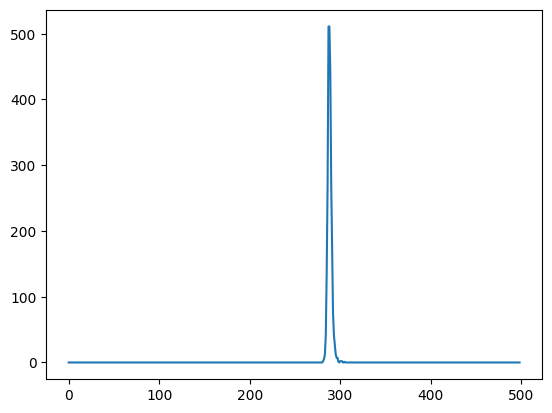

In [7]:
import matplotlib.pyplot as plt

plt.plot(time_delay[1])

time_delay = []
n_acq = 10
t_acq = 1e-3
for i in range(n_acq):
    acq = hist(t_acq,bin_width,nbins)
    time_delay.append(acq)
time_delay = np.array(time_delay)